In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import math
from statsmodels.tools.eval_measures import mse, rmse
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##2. EDA

In [0]:
telecom_df=pd.read_csv("https://raw.githubusercontent.com/sembahen/Data_Files/master/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
telecom_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telecom_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
telecom_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
telecom_df.shape

(7043, 21)

In [8]:
telecom_df["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [9]:
telecom_df["TotalCharges"].isnull().sum()

0

The feature "TotalCharges" was of type "object" and we are changing it to type "numeric"

In [0]:
#telecom_df[telecom_df["TotalChages"].apply(lambda x: True if type(x) == str else False)]["TotalChages"]
telecom_df["TotalCharges"] = telecom_df["TotalCharges"].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
#telecom_df["TotalCharges"] = telecom_df["TotalCharges"].apply(pd.to_numeric, errors='coerce')
#telecom_df["TotalCharges1"]=telecom_df["TotalCharges"].astype(float)
 

In [11]:
telecom_df["TotalCharges"].isnull().sum()

0

In [12]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
telecom_df["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [14]:
telecom_df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

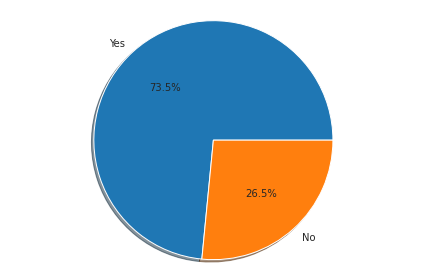

In [15]:
#check for the current pie chart
labels=['Yes', 'No']
sizes=[5174,1869]

#Plot a pie chart to show distribution
plt.pie(sizes, labels=labels, autopct='%1.1f%%' , shadow=True)

plt.axis('equal')
plt.tight_layout()

The target variable is not balanced. We have 73% YES and 27% NO

In [0]:
#Delete the customer ID column. It's useless
telecom_df=telecom_df.drop(['customerID'], axis=1)

In [17]:
#Lookling at the non_numeric columns
non_numeric_columns=telecom_df.select_dtypes(["object"]).columns
print(non_numeric_columns)
print("The number of non_numeric columns is {}".format(len(non_numeric_columns)))

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
The number of non_numeric columns is 16


In [18]:
#Lookling at the numeric columns
numeric_columns=telecom_df.select_dtypes(["int64","float64"]).columns
print(numeric_columns)
print("The number of numeric columns is {}".format(len(numeric_columns)))

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
The number of numeric columns is 4


In [19]:
telecom_df.shape

(7043, 20)

In [0]:
telecom_df_objects=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']

In [0]:
def new_label(x):
    if x=='Yes':
        return 1
    else:
        return 0
telecom_df_analysis=telecom_df.copy()    
telecom_df_analysis['Churn'] = telecom_df_analysis['Churn'].apply(new_label)  

In [22]:
telecom_df_analysis['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [23]:
telecom_df_analysis["Churn"].unique()

array([0, 1])

In [0]:
#for column in telecom_df_objects:
    #sns.catplot(x='Churn', y=column, kind="bar" ,data=telecom_df)
#plt.tight_layout()
#plt.show()

Label encoding the object type data

In [0]:
telecom_df2=telecom_df.copy()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
from sklearn.pipeline import Pipeline

#label_encoder = LabelEncoder.fit_transform(telecom_df_objects)

#for x in non_numeric_columns:
  #telecom_df["x"]=label_encoder.fit_transform(telecom_df['x'])

telecom_df2['gender'] =  label_encoder.fit_transform(telecom_df2['gender'])
telecom_df2['Partner'] =  label_encoder.fit_transform(telecom_df2['Partner'])
telecom_df2['Dependents'] =  label_encoder.fit_transform(telecom_df2['Dependents'])
telecom_df2['PhoneService'] =  label_encoder.fit_transform(telecom_df2['PhoneService'])
telecom_df2['MultipleLines'] =  label_encoder.fit_transform(telecom_df2['MultipleLines'])
telecom_df2['InternetService'] =  label_encoder.fit_transform(telecom_df2['InternetService'])
telecom_df2['OnlineSecurity'] =  label_encoder.fit_transform(telecom_df2['OnlineSecurity'])
telecom_df2['OnlineBackup'] =  label_encoder.fit_transform(telecom_df2['OnlineBackup'])
telecom_df2['DeviceProtection'] =  label_encoder.fit_transform(telecom_df2['DeviceProtection'])
telecom_df2['TechSupport'] =  label_encoder.fit_transform(telecom_df2['TechSupport'])
telecom_df2['StreamingTV'] =  label_encoder.fit_transform(telecom_df2['StreamingTV'])
telecom_df2['StreamingMovies'] =  label_encoder.fit_transform(telecom_df2['StreamingMovies'])
telecom_df2['Contract'] =  label_encoder.fit_transform(telecom_df2['Contract'])
telecom_df2['PaperlessBilling'] =  label_encoder.fit_transform(telecom_df2['PaperlessBilling'])
telecom_df2['PaymentMethod'] =  label_encoder.fit_transform(telecom_df2['PaymentMethod'])
telecom_df2['Churn'] =  label_encoder.fit_transform(telecom_df2['Churn'])

In [26]:
telecom_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


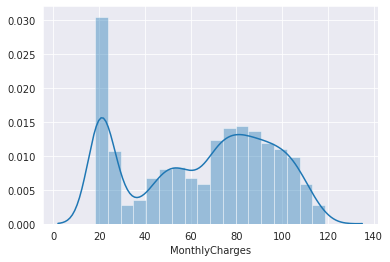

In [27]:
#A histogram for monthly charges
ax = sns.distplot(telecom_df['MonthlyCharges'])

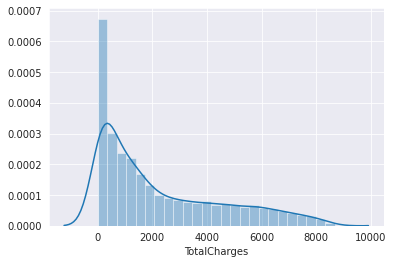

In [28]:
#Histogram for total charges
ax = sns.distplot(telecom_df['TotalCharges'])

Analyzing the continuous variables for potential outliers

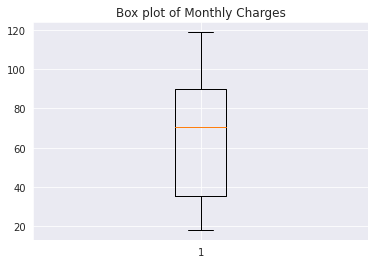

In [29]:
plt.boxplot(telecom_df["MonthlyCharges"])
plt.title("Box plot of Monthly Charges")
plt.show()

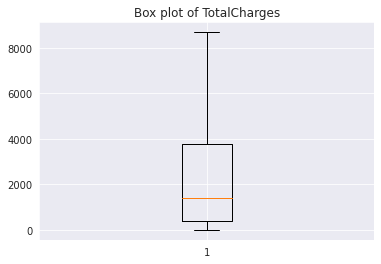

In [30]:
plt.boxplot(telecom_df["TotalCharges"])
plt.title("Box plot of TotalCharges")
plt.show()

In [31]:

telecom_df3=telecom_df.copy()
categorical = telecom_df3.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

gender
2
Partner
2
Dependents
2
PhoneService
2
MultipleLines
3
InternetService
3
OnlineSecurity
3
OnlineBackup
3
DeviceProtection
3
TechSupport
3
StreamingTV
3
StreamingMovies
3
Contract
3
PaperlessBilling
2
PaymentMethod
4
Churn
2


Next is the modeling process.
I begin by doing one Hot encoding

In [0]:
cat_vars=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod',
          'gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(telecom_df3[var], prefix=var)
    data1=telecom_df3.join(cat_list)
    telecom_df3=data1
cat_vars=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod',
          'gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']
data_vars=telecom_df3.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [0]:
telecom_df4=telecom_df3[to_keep]

In [34]:
telecom_df4.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mai

In [35]:
#Removing repetition after applying dummies for the Binary cateforical variables
telecom_df4=telecom_df4.drop(['gender_Female','Partner_No','Dependents_No','PhoneService_No','PaperlessBilling_No','Churn_No'], axis=1)
telecom_df4 = telecom_df4.rename(columns = {'Churn_Yes': 'Churn'})
telecom_df4.columns


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mai

In [36]:
telecom_df4.head() 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn
0,0,1,29.85,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,1,1
3,0,45,42.30,1840.75,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1


In [37]:
telecom_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   MultipleLines_No                         7043 non-null   uint8  
 5   MultipleLines_No phone service           7043 non-null   uint8  
 6   MultipleLines_Yes                        7043 non-null   uint8  
 7   InternetService_DSL                      7043 non-null   uint8  
 8   InternetService_Fiber optic              7043 non-null   uint8  
 9   InternetService_No                       7043 non-null   uint8  
 10  OnlineSecurity_No                        7043 no

We are now ready to implement unsupervised learning. We want to figure out whether the customer eventually churned or not


In [38]:
telecom_df4.shape

(7043, 41)

#K-Means

In [39]:
telecom_df4.iloc[:,40]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: uint8

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sqlalchemy import create_engine
import warnings
from sklearn.mixture import GaussianMixture
from sklearn import metrics
warnings.filterwarnings("ignore")

In [0]:
#Define the features
X = telecom_df4.iloc[:, :40]
y = telecom_df4.iloc[:, 40]


#standardize the features
scaler=StandardScaler()
X_std=scaler.fit_transform(X)

Next we go ahead and fit the k-means

In [42]:
#trying with different cluster numbers
# We also run the metrics for purposes of comparison
cluster_numbers=[2, 3, 4, 5]
kmeans_clusters=[]
for i in cluster_numbers:
 k_means=KMeans(n_clusters=i, random_state=455)
 y_pred=k_means.fit_predict(X_std)   
 kmeans_clusters.append(k_means.fit_predict(X_std))
 print("For number of clusters= {}".format(i))
 print("ARI score : {}".format(metrics.adjusted_rand_score(y, y_pred)))

 print("Silhouette score: {}".format(metrics.silhouette_score(X_std, y_pred, metric='euclidean')))
 print("-----------------------------------------------------------")

For number of clusters= 2
ARI score : -0.06539325963610504
Silhouette score: 0.2985220216360987
-----------------------------------------------------------
For number of clusters= 3
ARI score : 0.02774311630302961
Silhouette score: 0.22899412071109487
-----------------------------------------------------------
For number of clusters= 4
ARI score : 0.028178880344092584
Silhouette score: 0.2390900706510501
-----------------------------------------------------------
For number of clusters= 5
ARI score : 0.05164017017086899
Silhouette score: 0.20749189249082933
-----------------------------------------------------------


In [0]:
#The adjusted ARI score is lowest for number of Clusters=2
#The Silhouette score is highest when we use 2 clusters

Now we visualize the performance prediction of the K-means algorithm using the labels on the churn target variable

In [44]:

pca = PCA(n_components=2).fit_transform(X_std)

colours = 'rbg'
for i, solution in enumerate(kmeans_clusters):
    plt.figure(figsize=(10,5))
    plt.text(np.mean(pca[:,0]), np.max(pca[:, 1]), "K-means with k = {}".format(cluster_numbers[i]),
                 fontdict={'weight': 'bold', 'size': 50})
    
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(solution[i]),
                 color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50}
            )
        
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()
    

Output hidden; open in https://colab.research.google.com to view.

Since we know the ground truth , we can see clearly that k-means did a good in separating the classes of the target variable into 2 clusters even when we used 2 principal components. We already know that the correct number of clusters is 2 and we can see that most of the labels are correcly classified. As we increase the number of components most of the lables go to churn=Yes which is larger and on the left side.

#Hierarchical clustering

In [45]:
from sklearn.cluster import AgglomerativeClustering
#trying with different cluster numbers
cluster_numbers=[2,3,4]
agglomerative_clusters=[]
for i in cluster_numbers:
  agg_cluster = AgglomerativeClustering(linkage='complete', 
                                        affinity='cosine',
                                        n_clusters=i)

  #Fit model
  clusters = agg_cluster.fit_predict(X_std)  
  agglomerative_clusters.append(agg_cluster.fit_predict(X_std))
  print("For number of clusters= {}".format(i))
  print("ARI score : {}".format(metrics.adjusted_rand_score(y, clusters)))

  print("Silhouette score: {}".format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
  print("-----------------------------------------------------------")
  

For number of clusters= 2
ARI score : 0.1429196235134407
Silhouette score: 0.1163222454128842
-----------------------------------------------------------
For number of clusters= 3
ARI score : 0.15046728215101884
Silhouette score: 0.013776181925798945
-----------------------------------------------------------
For number of clusters= 4
ARI score : 0.1819591030633876
Silhouette score: 0.013131329022159948
-----------------------------------------------------------


In [46]:
#Visualize the clustering using 2 dimensional PCA
for i, solution in enumerate(agglomerative_clusters):
    plt.figure(figsize=(10,5))
    plt.text(np.mean(pca[:,0]), np.max(pca[:, 1]), "Hierarchial Clustering with {} clusters".format(cluster_numbers[i]),
                 fontdict={'weight': 'bold', 'size': 50})
    
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(solution[i]),
                 color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50}
            )
        
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

When you look at it visually, clearly we can see that Hierarchical clustering didn't do as good a job as K-means
 When we used 2 clusters(just lke the ground truth), we see that there are many instances incorrectly classified as 1 instead of 0.
 

Dendogram

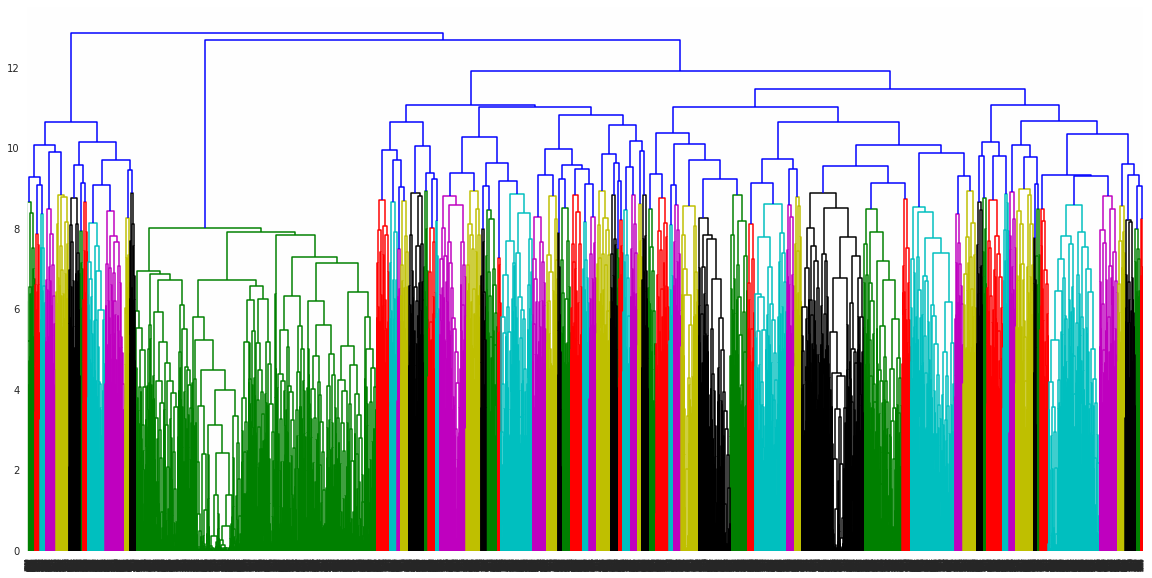

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

In [0]:
#The dednogram was not effective in identifying the 2 clusters. The dendogram identifies 3 clusters with two of them improperly classified.


DBSCAN approach to clustering

In [0]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [49]:

#dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model

#trying to fit the model and make prediction with different min samples
sample_number=[1,5,10]
dbscan=[]
for i in sample_number:
  dbscan_cluster = DBSCAN(eps=1, min_samples=i)

  #Fit model
  clusters = dbscan_cluster.fit_predict(X_std)  
  dbscan.append(dbscan_cluster.fit_predict(X_std))
  print("For number of min Samples= {}".format(i))
  print("ARI score : {}".format(metrics.adjusted_rand_score(y, clusters)))
  print("Number of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))
  print("Silhouette score: {}".format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
  print("-----------------------------------------------------------")

For number of min Samples= 1
ARI score : 0.0003020915111921108
Number of clusters when eps=1 is: 4665
Silhouette score: 0.3384321716721959
-----------------------------------------------------------
For number of min Samples= 5
ARI score : 0.004223595272065253
Number of clusters when eps=5 is: 153
Silhouette score: -0.16741507893050023
-----------------------------------------------------------
For number of min Samples= 10
ARI score : -0.0127847670172605
Number of clusters when eps=10 is: 50
Silhouette score: -0.1831133809540573
-----------------------------------------------------------


In [50]:
dbscan_cluster = DBSCAN(eps=6, min_samples=1)
clusters = dbscan_cluster.fit_predict(X_std)
print("ARI score : {}".format(metrics.adjusted_rand_score(y, clusters))) 
print("Silhouette score: {}".format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

ARI score : -0.06539325963610504
Silhouette score: 0.2985220216360987


If we don't know the ground truth, we wouldn't know the number of clusters needed but clearly epsilon would have to be a larger value than 10 unless the data has multiple clusters.


In [51]:
#Visualize the clustering using 2 dimensional PCA
for i, solution in enumerate(dbscan):
    plt.figure(figsize=(10,5))
    plt.text(np.mean(pca[:,0]), np.max(pca[:, 1]), "DBSCAN Clustering with {} min samples".format(sample_number[i]),
                 fontdict={'weight': 'bold', 'size': 50})
    
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(solution[i]),
                 color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50}
            )
        
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

We can see that when we used min samples =1 we got the best clusterign results with less miss-classifications. As we increased the min-samples to 5 and 10, most of the output was misclassified.

Now I retain the mmin samples as 1 and I try to increase the eps to figure out how that will affect the number of clusters.


In [52]:

dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

print("Number of clusters when eps=1 is: {}".format(len(np.unique(clusters))))

min_samples_list = range(2,51)

for i in [0.01,0.1,1,2,3,4,5,6,7,8,9,10]:
    dbscan_cluster = DBSCAN(eps=i, min_samples=1, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when eps=1 is: 4665
Number of clusters when eps=0.01 is: 6808
Number of clusters when eps=0.1 is: 5946
Number of clusters when eps=1 is: 4665
Number of clusters when eps=2 is: 4470
Number of clusters when eps=3 is: 1676
Number of clusters when eps=4 is: 241
Number of clusters when eps=5 is: 4
Number of clusters when eps=6 is: 2
Number of clusters when eps=7 is: 2
Number of clusters when eps=8 is: 2
Number of clusters when eps=9 is: 1
Number of clusters when eps=10 is: 1


In [0]:
#As we increase the epsilon, the number of clusters reduce. So iterating over the different combinations of eps and min samples helps us understand
#the optimum clusters for the model

Clustering with Gaussian Mixture Models

In [54]:
from sklearn.mixture import GaussianMixture
#trying with different cluster numbers
cluster_numbers=[2,3,4]
gmm_clusters=[]
for i in cluster_numbers:
  gmm_cluster = GaussianMixture(n_components=3, random_state=123)

  #Fit model
  clusters = gmm_cluster.fit_predict(X_std) 
  gmm_clusters.append(gmm_cluster.fit_predict(X_std))
  print("For number of clusters= {}".format(i))
  print("ARI score : {}".format(metrics.adjusted_rand_score(y, clusters)))

  print("Silhouette score: {}".format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
  print("-----------------------------------------------------------")

For number of clusters= 2
ARI score : 0.03215479642830274
Silhouette score: 0.22287518653126503
-----------------------------------------------------------
For number of clusters= 3
ARI score : 0.03215479642830274
Silhouette score: 0.22287518653126503
-----------------------------------------------------------
For number of clusters= 4
ARI score : 0.03215479642830274
Silhouette score: 0.22287518653126503
-----------------------------------------------------------


Comparison of the 3 methods ie. KNN, Hierarchical Clustering, DBSCAN, GMM by their ARI and Silhouette score

In [0]:
#Since we know the ground truth,(number of clusters=2), we will go ahead and compare the 3 methods using the metrics mentioned
# learning: clustering

#K-means                     ||| ARI score : -0.065   ||| Silhouette score: 0.298
#Hierarchical clustering     ||| ARI score : 0.143    ||| Silhouette score: 0.116
#DBSCAN clustering           ||| ARI score : -0.065   ||| Silhouette score: 0.298
#GMM                         ||| ARI score : 0.0321   ||| Silhouette score: 0.223

If we compare my the ARI score, the Hierarchical clustering seems to perform best. BY comparison using the silhourette score, however, K-means and DMSCAN perform better.

Dimensionality reduction with PCA

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
#fit-transform the data with PCA using 2 components for visualization
pca_components = pca.fit_transform(X)

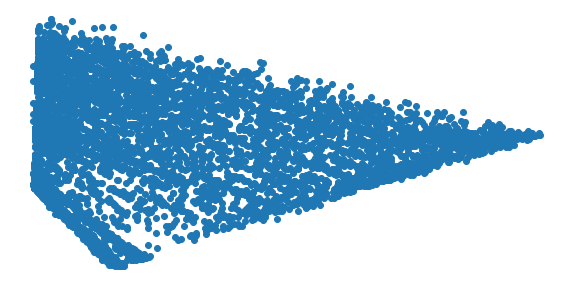

In [57]:

plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()



The PCA in 2 dimensional space it's hard to distinguish the data from the visualization as all the points look the same.

Dimensionality reduction with t-SNE

```
# This is formatted as code
```



In [0]:
#lets try 3 different prerplexilites: 20, 50 and 80

In [59]:
for x in [ 20, 50, 80]:
  tsne = TSNE(n_components=2, verbose=1, perplexity=x, n_iter=300)
  tsne_results = tsne.fit_transform(X)

  plt.figure(figsize=(10,5))
  plt.title("t-SNE with perplexity= {}".format(x))
  plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
  plt.xticks([])
  plt.yticks([])
  plt.axis('off')
  plt.show()

NameError: ignored

In [0]:
#It's really hard to tell which of the perplexities is better but is much better than the PCA because the global similarity structure of the 
#data is maintained



Dimensionality reduction with UMAP

In [0]:
import umap

In [0]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [0]:
# Play with neigbors
for x in [2, 5, 8]:
  print("N-neigbors: {}".format(x))
  umap_results = umap.UMAP(n_neighbors=x,
                       min_dist=0.3,
                       metric='correlation').fit_transform(X)

  plt.figure(figsize=(10,5))
  plt.title("Umap with n_neighbors={} and min_dist=0.3".format(x))
  plt.scatter(umap_results[:, 0], umap_results[:, 1])
  plt.xticks([])
  plt.yticks([])
  plt.axis('off')
  plt.show()

Conclusion:
Overall UMAP and TSNE perform better than PCA when it comes to dimension reduction as it is easier to distinguish the results if the ground truth is unknown